# Deep Dream Algorithm using Tensorflow (AI Art) by [sp@rkyAD](https://www.linkedin.com/in/abhik-dey-sparky/)
* _This is my [Reference](https://www.tensorflow.org/tutorials/generative/deepdream)_

**Checking-up my system has GPU or not**

In [37]:
pip install nvidia-ml-py3

Note: you may need to restart the kernel to use updated packages.


In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15893769432937361559
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2252393678
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15950746920618366934
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please ensure you have installed TensorFlow correctly')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 2.10.1
Default GPU Device: /device:GPU:0


* **Importing Necessary Libraries**

In [3]:
import tensorflow as tf # For model building and GPU using

import pandas as pd  # For creating dataframe and manipulating data
import numpy as np  # For speed-up the vector/tensor manipulation and also using linear algebric functions
import matplotlib.pyplot as plt  # Data visualization just like *MATLAB*
import seaborn as sns  # For making statistical graphs also can be used on top of *Matplotlib*
import random  # For generating random integers
import os  # For interacting with the Operating-System
from PIL import Image  # For opening, maipulating and saving different image file formats
import cv2  # For using and anlyzing the image in a simple manner


---

---

### I'm going to use **Transfer Learning, Inception model & ImageNet datastet**. 

* **Transfer Learning**: Transfer learning is a machine learning approach where knowledge gained from solving one task is leveraged to improve performance on a different but related task. 

* [**Inception Model V3**](https://arxiv.org/abs/1512.00567): Is a deep learning model based on Convolutional Neural Networks, which is used for image classification trained on ImageNet dataset. The inception V3 is a superior version of the basic model Inception V1 which was introduced as GoogLeNet in 2014.

* **ImageNet**: The most highly-used subset of ImageNet is the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2012-2017 image classification and localization dataset. This dataset spans 1000 object classes and contains 1,281,167 training images, 50,000 validation images and 100,000 test images. This subset is available on [_Kaggle_](https://www.kaggle.com/competitions/imagenet-object-localization-challenge/data). 

---

---

* **Importing the [_Inception-V3 Model_](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/InceptionV3)**

In [ ]:
#include_top = False, is related to exclude the first layer of the neural net. 
model = tf.keras.applications.InceptionV3(include_top = False, weights = 'imagenet')

In [3]:
url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg'

In [4]:
def download(url, max_dim=None):
    name = url.split('/')[-1]
    image_path = tf.keras.utils.get_file(name, origin=url, extract=True)
    img = Image.open(image_path)
    if max_dim:
        img.thumbnail((max_dim, max_dim))
    return np.array(img)

In [5]:
def deprocess(img):
    img = 255*(img + 1.0)/2.0
    return tf.cast(img, tf.uint8)

In [6]:
def show(img):
    display.display(Image.fromarray(np.array(img)))

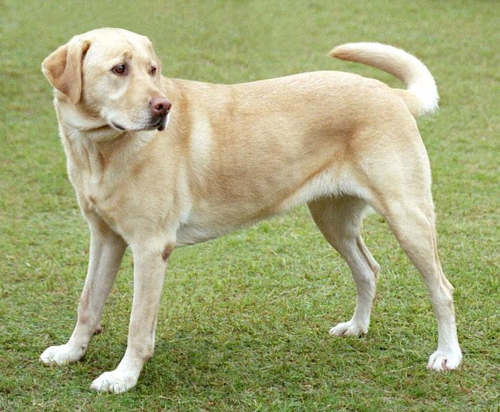

In [7]:
original_image = download(url, max_dim=500)
show(original_image)

In [8]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

In [9]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                    

 batch_normalization_221 (Batch  (None, None, None,   96         ['conv2d_221[0][0]']             
 Normalization)                 32)                                                               
                                                                                                  
 activation_221 (Activation)    (None, None, None,   0           ['batch_normalization_221[0][0]']
                                32)                                                               
                                                                                                  
 conv2d_219 (Conv2D)            (None, None, None,   10240       ['block35_3_ac[0][0]']           
                                32)                                                               
                                                                                                  
 conv2d_222 (Conv2D)            (None, None, None,   13824       ['activation_221[0][0]']         
          

 Normalization)                 48)                                                               
                                                                                                  
 activation_225 (Activation)    (None, None, None,   0           ['batch_normalization_225[0][0]']
                                32)                                                               
                                                                                                  
 activation_228 (Activation)    (None, None, None,   0           ['batch_normalization_228[0][0]']
                                48)                                                               
                                                                                                  
 conv2d_224 (Conv2D)            (None, None, None,   10240       ['block35_4_ac[0][0]']           
                                32)                                                               
          

                                                                                                  
 batch_normalization_230 (Batch  (None, None, None,   96         ['conv2d_230[0][0]']             
 Normalization)                 32)                                                               
                                                                                                  
 batch_normalization_232 (Batch  (None, None, None,   96         ['conv2d_232[0][0]']             
 Normalization)                 32)                                                               
                                                                                                  
 batch_normalization_235 (Batch  (None, None, None,   192        ['conv2d_235[0][0]']             
 Normalization)                 64)                                                               
                                                                                                  
 activatio

 activation_241 (Activation)    (None, None, None,   0           ['batch_normalization_241[0][0]']
                                64)                                                               
                                                                                                  
 block35_7_mixed (Concatenate)  (None, None, None,   0           ['activation_236[0][0]',         
                                128)                              'activation_238[0][0]',         
                                                                  'activation_241[0][0]']         
                                                                                                  
 block35_7_conv (Conv2D)        (None, None, None,   41280       ['block35_7_mixed[0][0]']        
                                320)                                                              
                                                                                                  
 block35_7

 conv2d_251 (Conv2D)            (None, None, None,   10240       ['block35_8_ac[0][0]']           
                                32)                                                               
                                                                                                  
 batch_normalization_251 (Batch  (None, None, None,   96         ['conv2d_251[0][0]']             
 Normalization)                 32)                                                               
                                                                                                  
 activation_251 (Activation)    (None, None, None,   0           ['batch_normalization_251[0][0]']
                                32)                                                               
                                                                                                  
 conv2d_249 (Conv2D)            (None, None, None,   10240       ['block35_8_ac[0][0]']           
          

 Normalization)                 32)                                                               
                                                                                                  
 batch_normalization_258 (Batch  (None, None, None,   144        ['conv2d_258[0][0]']             
 Normalization)                 48)                                                               
                                                                                                  
 activation_255 (Activation)    (None, None, None,   0           ['batch_normalization_255[0][0]']
                                32)                                                               
                                                                                                  
 activation_258 (Activation)    (None, None, None,   0           ['batch_normalization_258[0][0]']
                                48)                                                               
          

                                                                                                  
 activation_263 (Activation)    (None, None, None,   0           ['batch_normalization_263[0][0]']
                                384)                                                              
                                                                                                  
 max_pooling2d_16 (MaxPooling2D  (None, None, None,   0          ['block35_10_ac[0][0]']          
 )                              320)                                                              
                                                                                                  
 mixed_6a (Concatenate)         (None, None, None,   0           ['activation_260[0][0]',         
                                1088)                             'activation_263[0][0]',         
                                                                  'max_pooling2d_16[0][0]']       
          

 batch_normalization_268 (Batch  (None, None, None,   576        ['conv2d_268[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_271 (Batch  (None, None, None,   576        ['conv2d_271[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 activation_268 (Activation)    (None, None, None,   0           ['batch_normalization_268[0][0]']
                                192)                                                              
                                                                                                  
 activation_271 (Activation)    (None, None, None,   0           ['batch_normalization_271[0][0]']
          

                                                                                                  
 batch_normalization_278 (Batch  (None, None, None,   480        ['conv2d_278[0][0]']             
 Normalization)                 160)                                                              
                                                                                                  
 activation_278 (Activation)    (None, None, None,   0           ['batch_normalization_278[0][0]']
                                160)                                                              
                                                                                                  
 conv2d_276 (Conv2D)            (None, None, None,   208896      ['block17_3_ac[0][0]']           
                                192)                                                              
                                                                                                  
 conv2d_27

                                1088)                                                             
                                                                                                  
 conv2d_285 (Conv2D)            (None, None, None,   139264      ['block17_5_ac[0][0]']           
                                128)                                                              
                                                                                                  
 batch_normalization_285 (Batch  (None, None, None,   384        ['conv2d_285[0][0]']             
 Normalization)                 128)                                                              
                                                                                                  
 activation_285 (Activation)    (None, None, None,   0           ['batch_normalization_285[0][0]']
                                128)                                                              
          

 activation_291 (Activation)    (None, None, None,   0           ['batch_normalization_291[0][0]']
                                192)                                                              
                                                                                                  
 block17_7_mixed (Concatenate)  (None, None, None,   0           ['activation_288[0][0]',         
                                384)                              'activation_291[0][0]']         
                                                                                                  
 block17_7_conv (Conv2D)        (None, None, None,   418880      ['block17_7_mixed[0][0]']        
                                1088)                                                             
                                                                                                  
 block17_7 (Lambda)             (None, None, None,   0           ['block17_6_ac[0][0]',           
          

                                                                                                  
 conv2d_299 (Conv2D)            (None, None, None,   215040      ['activation_298[0][0]']         
                                192)                                                              
                                                                                                  
 batch_normalization_296 (Batch  (None, None, None,   576        ['conv2d_296[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_299 (Batch  (None, None, None,   576        ['conv2d_299[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 activatio

                                128)                                                              
                                                                                                  
 conv2d_306 (Conv2D)            (None, None, None,   143360      ['activation_305[0][0]']         
                                160)                                                              
                                                                                                  
 batch_normalization_306 (Batch  (None, None, None,   480        ['conv2d_306[0][0]']             
 Normalization)                 160)                                                              
                                                                                                  
 activation_306 (Activation)    (None, None, None,   0           ['batch_normalization_306[0][0]']
                                160)                                                              
          

 block17_12 (Lambda)            (None, None, None,   0           ['block17_11_ac[0][0]',          
                                1088)                             'block17_12_conv[0][0]']        
                                                                                                  
 block17_12_ac (Activation)     (None, None, None,   0           ['block17_12[0][0]']             
                                1088)                                                             
                                                                                                  
 conv2d_313 (Conv2D)            (None, None, None,   139264      ['block17_12_ac[0][0]']          
                                128)                                                              
                                                                                                  
 batch_normalization_313 (Batch  (None, None, None,   384        ['conv2d_313[0][0]']             
 Normaliza

                                                                                                  
 activation_316 (Activation)    (None, None, None,   0           ['batch_normalization_316[0][0]']
                                192)                                                              
                                                                                                  
 activation_319 (Activation)    (None, None, None,   0           ['batch_normalization_319[0][0]']
                                192)                                                              
                                                                                                  
 block17_14_mixed (Concatenate)  (None, None, None,   0          ['activation_316[0][0]',         
                                384)                              'activation_319[0][0]']         
                                                                                                  
 block17_1

                                160)                                                              
                                                                                                  
 conv2d_324 (Conv2D)            (None, None, None,   208896      ['block17_15_ac[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_327 (Conv2D)            (None, None, None,   215040      ['activation_326[0][0]']         
                                192)                                                              
                                                                                                  
 batch_normalization_324 (Batch  (None, None, None,   576        ['conv2d_324[0][0]']             
 Normalization)                 192)                                                              
          

 batch_normalization_333 (Batch  (None, None, None,   384        ['conv2d_333[0][0]']             
 Normalization)                 128)                                                              
                                                                                                  
 activation_333 (Activation)    (None, None, None,   0           ['batch_normalization_333[0][0]']
                                128)                                                              
                                                                                                  
 conv2d_334 (Conv2D)            (None, None, None,   143360      ['activation_333[0][0]']         
                                160)                                                              
                                                                                                  
 batch_normalization_334 (Batch  (None, None, None,   480        ['conv2d_334[0][0]']             
 Normaliza

                                                                                                  
 block17_19_conv (Conv2D)       (None, None, None,   418880      ['block17_19_mixed[0][0]']       
                                1088)                                                             
                                                                                                  
 block17_19 (Lambda)            (None, None, None,   0           ['block17_18_ac[0][0]',          
                                1088)                             'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, None, None,   0           ['block17_19[0][0]']             
                                1088)                                                             
                                                                                                  
 conv2d_34

 Normalization)                 288)                                                              
                                                                                                  
 activation_344 (Activation)    (None, None, None,   0           ['batch_normalization_344[0][0]']
                                256)                                                              
                                                                                                  
 activation_346 (Activation)    (None, None, None,   0           ['batch_normalization_346[0][0]']
                                256)                                                              
                                                                                                  
 activation_349 (Activation)    (None, None, None,   0           ['batch_normalization_349[0][0]']
                                288)                                                              
          

                                448)                              'activation_354[0][0]']         
                                                                                                  
 block8_1_conv (Conv2D)         (None, None, None,   933920      ['block8_1_mixed[0][0]']         
                                2080)                                                             
                                                                                                  
 block8_1 (Lambda)              (None, None, None,   0           ['mixed_7a[0][0]',               
                                2080)                             'block8_1_conv[0][0]']          
                                                                                                  
 block8_1_ac (Activation)       (None, None, None,   0           ['block8_1[0][0]']               
                                2080)                                                             
          

 batch_normalization_359 (Batch  (None, None, None,   576        ['conv2d_359[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_362 (Batch  (None, None, None,   768        ['conv2d_362[0][0]']             
 Normalization)                 256)                                                              
                                                                                                  
 activation_359 (Activation)    (None, None, None,   0           ['batch_normalization_359[0][0]']
                                192)                                                              
                                                                                                  
 activation_362 (Activation)    (None, None, None,   0           ['batch_normalization_362[0][0]']
          

                                                                                                  
 batch_normalization_369 (Batch  (None, None, None,   672        ['conv2d_369[0][0]']             
 Normalization)                 224)                                                              
                                                                                                  
 activation_369 (Activation)    (None, None, None,   0           ['batch_normalization_369[0][0]']
                                224)                                                              
                                                                                                  
 conv2d_367 (Conv2D)            (None, None, None,   399360      ['block8_4_ac[0][0]']            
                                192)                                                              
                                                                                                  
 conv2d_37

                                2080)                                                             
                                                                                                  
 conv2d_376 (Conv2D)            (None, None, None,   399360      ['block8_6_ac[0][0]']            
                                192)                                                              
                                                                                                  
 batch_normalization_376 (Batch  (None, None, None,   576        ['conv2d_376[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 activation_376 (Activation)    (None, None, None,   0           ['batch_normalization_376[0][0]']
                                192)                                                              
          

 activation_382 (Activation)    (None, None, None,   0           ['batch_normalization_382[0][0]']
                                256)                                                              
                                                                                                  
 block8_8_mixed (Concatenate)   (None, None, None,   0           ['activation_379[0][0]',         
                                448)                              'activation_382[0][0]']         
                                                                                                  
 block8_8_conv (Conv2D)         (None, None, None,   933920      ['block8_8_mixed[0][0]']         
                                2080)                                                             
                                                                                                  
 block8_8 (Lambda)              (None, None, None,   0           ['block8_7_ac[0][0]',            
          

                                                                                                  
 conv2d_390 (Conv2D)            (None, None, None,   172032      ['activation_389[0][0]']         
                                256)                                                              
                                                                                                  
 batch_normalization_387 (Batch  (None, None, None,   576        ['conv2d_387[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_390 (Batch  (None, None, None,   768        ['conv2d_390[0][0]']             
 Normalization)                 256)                                                              
                                                                                                  
 activatio

In [10]:
names = ['mixed3', 'mixed5']
layers = [base_model.get_layer(name).output for name in names]

In [11]:
dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)

In [12]:
def calc_loss(img, model):
  img_batch = tf.expand_dims(img, axis=0)
  layer_activations = model(img_batch)
  if len(layer_activations) == 1:
    layer_activations = [layer_activations]

  losses = []
  for act in layer_activations:
    loss = tf.math.reduce_mean(act)
    losses.append(loss)

  return  tf.reduce_sum(losses)

In [13]:
class DeepDream(tf.Module):
  def __init__(self, model):
    self.model = model

  @tf.function(
      input_signature=(
        tf.TensorSpec(shape=[None,None,3], dtype=tf.float32),
        tf.TensorSpec(shape=[], dtype=tf.int32),
        tf.TensorSpec(shape=[], dtype=tf.float32),)
  )
  def __call__(self, img, steps, step_size):
      print("Tracing")
      loss = tf.constant(0.0)
      for n in tf.range(steps):
        with tf.GradientTape() as tape:
          tape.watch(img)
          loss = calc_loss(img, self.model)

        gradients = tape.gradient(loss, img)

        gradients /= tf.math.reduce_std(gradients) + 1e-8 

        img = img + gradients*step_size
        img = tf.clip_by_value(img, -1, 1)

      return loss, img

In [14]:
deepdream = DeepDream(dream_model)

In [15]:
def run_deep_dream_simple(img, steps, step_size):

  img = tf.keras.applications.inception_v3.preprocess_input(img)
  img = tf.convert_to_tensor(img)
  step_size = tf.convert_to_tensor(step_size)
  steps_remaining = steps
  step = 0
  while steps_remaining:
    if steps_remaining > 100:
      run_steps = tf.constant(100)
    else:
      run_steps = tf.constant(steps_remaining)
    steps_remaining -= run_steps
    step += run_steps

    loss, img = deepdream(img, run_steps, tf.constant(step_size))

    display.clear_output(wait=True)
    show(deprocess(img))
    print("Step {}, loss {}".format(step, loss))

  result = deprocess(img)
  display.clear_output(wait=True)
  show(result)

  return result

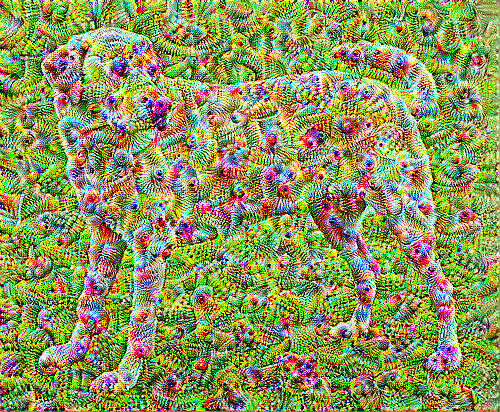

In [16]:
dream_img = run_deep_dream_simple(img=original_image, steps=1000, step_size=0.01)

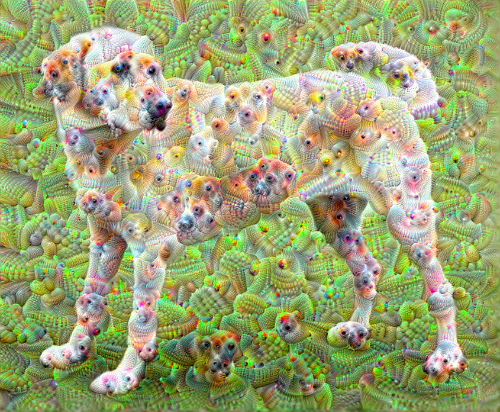

34.5640230178833

In [17]:
import time
start = time.time()

OCTAVE_SCALE = 1.30

img = tf.constant(np.array(original_image))
base_shape = tf.shape(img)[:-1]
float_base_shape = tf.cast(base_shape, tf.float32)

for n in range(-2, 3):
  new_shape = tf.cast(float_base_shape*(OCTAVE_SCALE**n), tf.int32)

  img = tf.image.resize(img, new_shape).numpy()

  img = run_deep_dream_simple(img=img, steps=50, step_size=0.01)

display.clear_output(wait=True)
img = tf.image.resize(img, base_shape)
img = tf.image.convert_image_dtype(img/255.0, dtype=tf.uint8)
show(img)

end = time.time()
end - start

In [18]:
def random_roll(img, maxroll):
  shift = tf.random.uniform(shape=[2], minval=-maxroll, maxval=maxroll, dtype=tf.int32)
  img_rolled = tf.roll(img, shift=shift, axis=[0,1])
  return shift, img_rolled

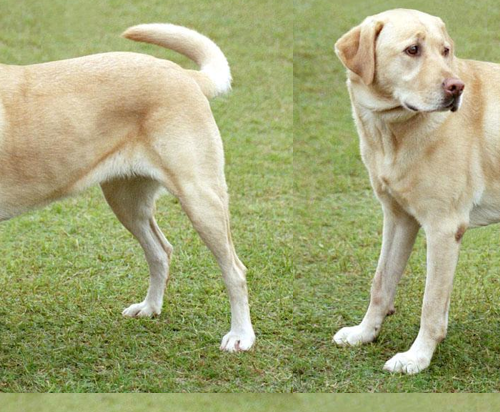

In [19]:
shift, img_rolled = random_roll(np.array(original_image), 2048)
show(img_rolled)

In [20]:
class TiledGradients(tf.Module):
  def __init__(self, model):
    self.model = model

  @tf.function(
      input_signature=(
        tf.TensorSpec(shape=[None,None,3], dtype=tf.float32),
        tf.TensorSpec(shape=[2], dtype=tf.int32),
        tf.TensorSpec(shape=[], dtype=tf.int32),)
  )
  def __call__(self, img, img_size, tile_size=512):
    shift, img_rolled = random_roll(img, tile_size)

    # Initialize the image gradients to zero.
    gradients = tf.zeros_like(img_rolled)

    # Skip the last tile, unless there's only one tile.
    xs = tf.range(0, img_size[1], tile_size)[:-1]
    if not tf.cast(len(xs), bool):
      xs = tf.constant([0])
    ys = tf.range(0, img_size[0], tile_size)[:-1]
    if not tf.cast(len(ys), bool):
      ys = tf.constant([0])

    for x in xs:
      for y in ys:
        # Calculate the gradients for this tile.
        with tf.GradientTape() as tape:
          # This needs gradients relative to `img_rolled`.
          # `GradientTape` only watches `tf.Variable`s by default.
          tape.watch(img_rolled)

          # Extract a tile out of the image.
          img_tile = img_rolled[y:y+tile_size, x:x+tile_size]
          loss = calc_loss(img_tile, self.model)

        # Update the image gradients for this tile.
        gradients = gradients + tape.gradient(loss, img_rolled)

    # Undo the random shift applied to the image and its gradients.
    gradients = tf.roll(gradients, shift=-shift, axis=[0,1])

    # Normalize the gradients.
    gradients /= tf.math.reduce_std(gradients) + 1e-8 

    return gradients

In [21]:
get_tiled_gradients = TiledGradients(base_model)

In [22]:
def run_deep_dream_with_octaves(img, steps_per_octave=100, step_size=0.01, 
                                octaves=range(-2,3), octave_scale=1.3):
  base_shape = tf.shape(img)
  img = tf.keras.utils.img_to_array(img)
  img = tf.keras.applications.inception_v3.preprocess_input(img)

  initial_shape = img.shape[:-1]
  img = tf.image.resize(img, initial_shape)
  for octave in octaves:
    # Scale the image based on the octave
    new_size = tf.cast(tf.convert_to_tensor(base_shape[:-1]), tf.float32)*(octave_scale**octave)
    new_size = tf.cast(new_size, tf.int32)
    img = tf.image.resize(img, new_size)

    for step in range(steps_per_octave):
      gradients = get_tiled_gradients(img, new_size)
      img = img + gradients*step_size
      img = tf.clip_by_value(img, -1, 1)

      if step % 10 == 0:
        display.clear_output(wait=True)
        show(deprocess(img))
        print ("Octave {}, Step {}".format(octave, step))

  result = deprocess(img)
  return result

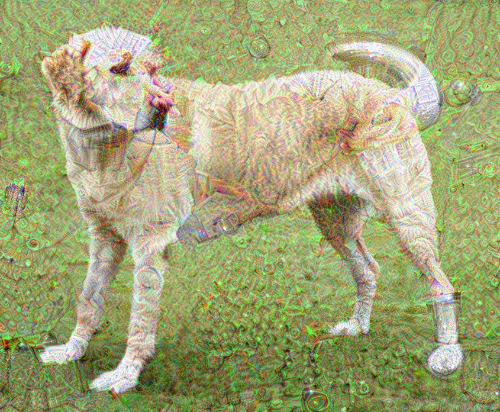

In [23]:
img = run_deep_dream_with_octaves(img=original_image, step_size=0.01)

display.clear_output(wait=True)
img = tf.image.resize(img, base_shape)
img = tf.image.convert_image_dtype(img/255.0, dtype=tf.uint8)
show(img)